In [1]:
# import the load_boston() function from sklearn.datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


boston = load_boston()

print(boston.data)
print(boston.data.shape)

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target

df.head()

/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibili

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


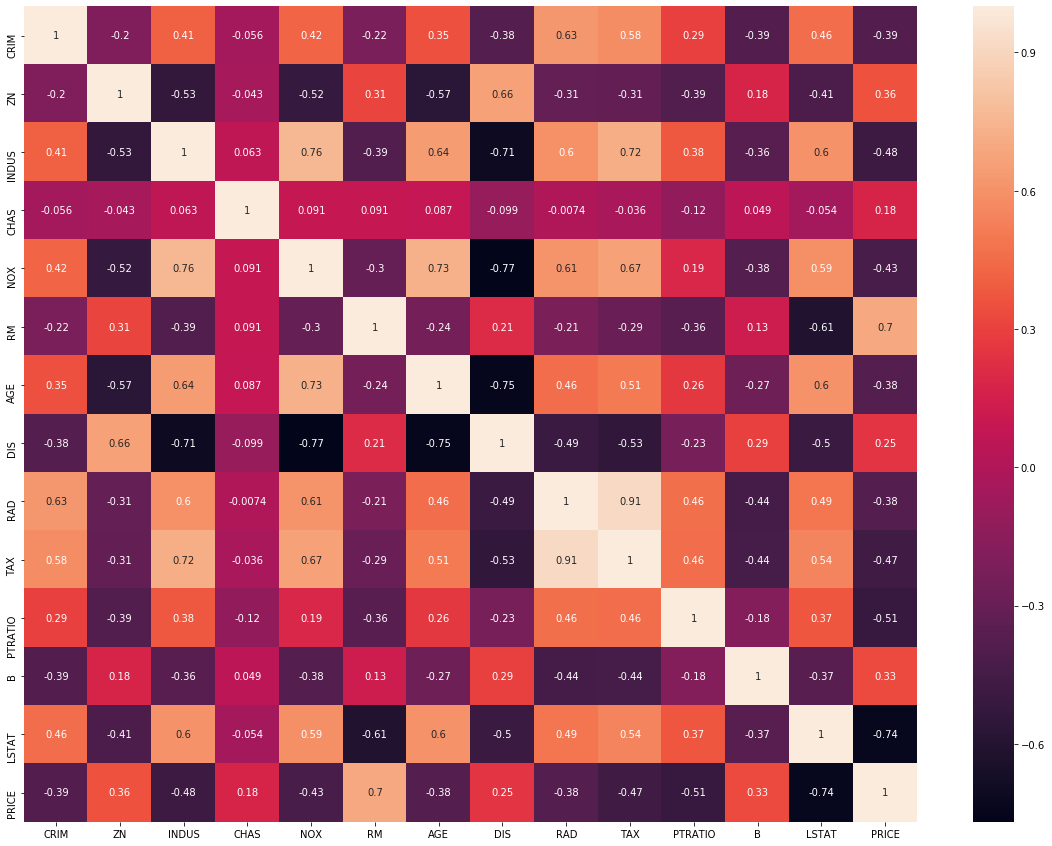

In [2]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['PRICE'])
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
49     19.4
498    21.2
309    20.3
124    18.8
306    33.4
Name: PRICE, Length: 127, dtype: float64

In [5]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
309,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58


In [6]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = linreg.predict(X_test)

In [8]:
# Mean Squared Error
mean_squared_error(y_test, y_pred)

29.782245092302336

In [9]:
# R Squared score
r2_score(y_test, y_pred)

0.6354638433202133

In [25]:
# Normalizing data
std_scaler = StandardScaler()
std_scaler.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
standard_X = std_scaler.transform(X_train)

In [27]:
standard_X

array([[-0.3906002 ,  0.42637011, -0.74491444, ...,  0.27878885,
         0.34049624,  0.82212111],
       [-0.40127639,  0.5525335 , -0.84901832, ...,  0.55287698,
         0.42774893, -0.46241699],
       [-0.40110543,  1.18335044, -0.66648002, ..., -0.40643148,
         0.34184377, -0.90310809],
       ...,
       [-0.3954927 , -0.49882807, -0.15309105, ..., -0.31506877,
         0.40091059, -0.31227617],
       [-0.38599992, -0.49882807, -0.59517599, ..., -0.26938741,
         0.38103449,  0.86938766],
       [-0.39692832, -0.49882807, -1.003035  , ..., -0.86324503,
         0.42774893,  0.29801844]])

In [28]:
linreg.fit(standard_X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = linreg.predict(std_scaler.transform(X_test))

In [30]:
# Using standardized data gives the same r2 score
r2_score(y_test, y_pred)

0.6354638433202133

In [31]:
# Using MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train, y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
minmax_X = mm_scaler.transform(X_train)

In [34]:
minmax_X

array([[0.00207947, 0.22      , 0.19794721, ..., 0.69148936, 0.98040748,
        0.47460993],
       [0.00108981, 0.25      , 0.17118768, ..., 0.75531915, 1.        ,
        0.21248227],
       [0.00110566, 0.4       , 0.2181085 , ..., 0.53191489, 0.98071007,
        0.12255319],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.55319149, 0.99397347,
        0.24312057],
       [0.0025059 , 0.        , 0.23643695, ..., 0.56382979, 0.98951031,
        0.48425532],
       [0.00149286, 0.        , 0.13159824, ..., 0.42553191, 1.        ,
        0.36765957]])

In [35]:
linreg.fit(minmax_X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = linreg.predict(mm_scaler.transform(X_test))

In [39]:
# Using minmax normalized data gives the same r2 score
r2_score(y_test, y_pred)

0.6354638433202124